# Mini-Project - Cross Validating a Linear Regression Model
# Author- Mohit Kosekar
# Data Science

## Introduction:
Cross-validation is a powerful technique used to evaluate the performance of a machine learning model. In the context of linear regression, cross-validation helps us assess how well the model generalizes to unseen data. By splitting the data into multiple subsets, training the model on different subsets, and evaluating its performance on the remaining subset, we can get a more robust estimate of the model's true accuracy.

## Steps:

1. **Data Preparation**:
   - Load the dataset containing features and target variables.
   - Preprocess the data, if necessary, by handling missing values, outliers, and feature scaling.

2. **Splitting the Data**:
   - Divide the data into multiple folds (e.g., 5 or 10 folds) using a random or stratified sampling technique.

3. **Model Training and Evaluation**:
   - For each fold:
      - Use the data from all folds except the current fold as the training set.
      - Train the linear regression model on the training set.
      - Evaluate the model's performance on the current fold (test set) using a suitable metric, such as mean squared error (MSE) or R-squared.

4. **Performance Aggregation**:
   - Calculate the average performance metric across all folds.
   - This average metric provides an estimate of the model's generalization error.

5. **Analysis**:
   - Based on the average performance metric, determine the effectiveness of the model.
   - If the performance is not satisfactory, consider tuning the model's hyperparameters or exploring other model types.

6. **Conclusion**:
   - Cross-validation provides a reliable way to assess the performance of a linear regression model and helps in making informed decisions about its use in real-world applications.


## Import Packages and Libraries
Below we import the libraries, packages, and formatting for the plots we are going to be using in this study.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm
import scipy
from scipy.stats import probplot
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Libraries for Matplotlib graphs
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

In [ ]:
# Importing M2_Data.csv from my github repository
m2df = pd.read_csv("https://raw.githubusercontent.com/mohit-kosekar/DAV-6150-repo/main/M2_Data.csv")

# Checking first 10 rows
m2df.head(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


#**Data Cleaning**

Providing meaningful column names to the dataframe

Since the data came with names that were not legible, we have cleaned up the data frame so that it is more user friendly.

Column Name issue
There is no column header, We have to create a our own in a list from this link and identifying what column represent what data
Link: https://archive.ics.uci.edu/dataset/10/automobile

In [ ]:
variable_names=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
                 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
                 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size','fuel_system',
                 'bore', 'stroke', 'compression_ratio', 'horsepower','peak_rpm', 'city_mpg',
                 'highway_mpg', 'price']
print(variable_names)

['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [ ]:
m2df2 = pd.read_csv("https://raw.githubusercontent.com/mohit-kosekar/DAV-6150-repo/main/M2_Data.csv", names=variable_names)
m2df2.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [ ]:
# Describe the dataframe
m2df2.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
# Getting the info of the dataframe
m2df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

#**Missing values**

We can clearly see that there are several question marks ('?'). These represent Null values in the data. Below we replace the question marks with Null values. We did this because it is easier to impute data and identifying missing values with NaN's.

In [ ]:
# Checking the null values
m2df2.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [ ]:
# Replacing the question marks with NaN.
m2df2 = m2df2.replace('?', np.NaN)

# Show the top 3.
m2df2.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [ ]:
m2df2.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

##**Reformating strings into Numeric values**

In [ ]:
m2df2['normalized_losses'].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized_losses, dtype: int64

Below we will take data which is formatted as text and replace it with numerical values that correspond. We do this for columns: num_of_doors and num_of_cylinders.
(i.e. for 'two' we will replace it with 2)

In [ ]:
# Replacing with numbers for future section on ML model creation
m2df2['num_of_doors'].replace('two', 2, inplace=True)
m2df2['num_of_doors'].replace('four', 4, inplace=True)

In [ ]:
# Checking the count of num-of-doors
m2df2['num_of_doors'].value_counts()

4.0    114
2.0     89
Name: num_of_doors, dtype: int64

In [ ]:
# Checking the count of num-of-doors
m2df2['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [ ]:
m2df2['num_of_cylinders'].replace('four', 4, inplace=True)
m2df2['num_of_cylinders'].replace('six', 6, inplace=True)
m2df2['num_of_cylinders'].replace('five', 5, inplace=True)
m2df2['num_of_cylinders'].replace('eight', 8, inplace=True)
m2df2['num_of_cylinders'].replace('two', 2, inplace=True)
m2df2['num_of_cylinders'].replace('twelve', 12, inplace=True)
m2df2['num_of_cylinders'].replace('three', 3, inplace=True)

In [ ]:
# Checking count of num_of_cylinders
m2df2['num_of_cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num_of_cylinders, dtype: int64

# **Exploratory Data Analysis**

### Missing Data

In this section we will check for the missing values in the data and visualize what is missing so we can make an informed decision on which strategy to pursue to handle missing values.

In [ ]:
print()
print("\t \t \t \tCount of the Missing Values")

# Separator
print("\t \t-----------------------------------------------------------")

# Getting exact number of null values in each column
print("")
missing = m2df2.isnull().sum()
missing.sort_values(inplace=True,ascending=False)
print(missing[0:9])

# Separator
print("\t \t\t\tMissing Values as a percentage %")
print("\t \t-----------------------------------------------------------")

# Getting exact number of null values in each column
# Get percent of missing data
print("")
missing = m2df2.isnull().mean() * 100
missing.sort_values(inplace=True,ascending=False)
missing[0:8]


	 	 	 	Count of the Missing Values
	 	-----------------------------------------------------------

normalized_losses    41
price                 4
stroke                4
bore                  4
peak_rpm              2
num_of_doors          2
horsepower            2
engine_type           0
highway_mpg           0
dtype: int64
	 			Missing Values as a percentage %
	 	-----------------------------------------------------------



normalized_losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak_rpm              0.97561
num_of_doors          0.97561
horsepower            0.97561
engine_type           0.00000
dtype: float64

Here we see that the null values in 7 features: normalized-losses, bore, stroke, price, num-of-doors, horsepower and peak-rpm, with 'normalized-losses' as the attribute with the highest number of missing data with 41, that corresponds to 20% of the records.

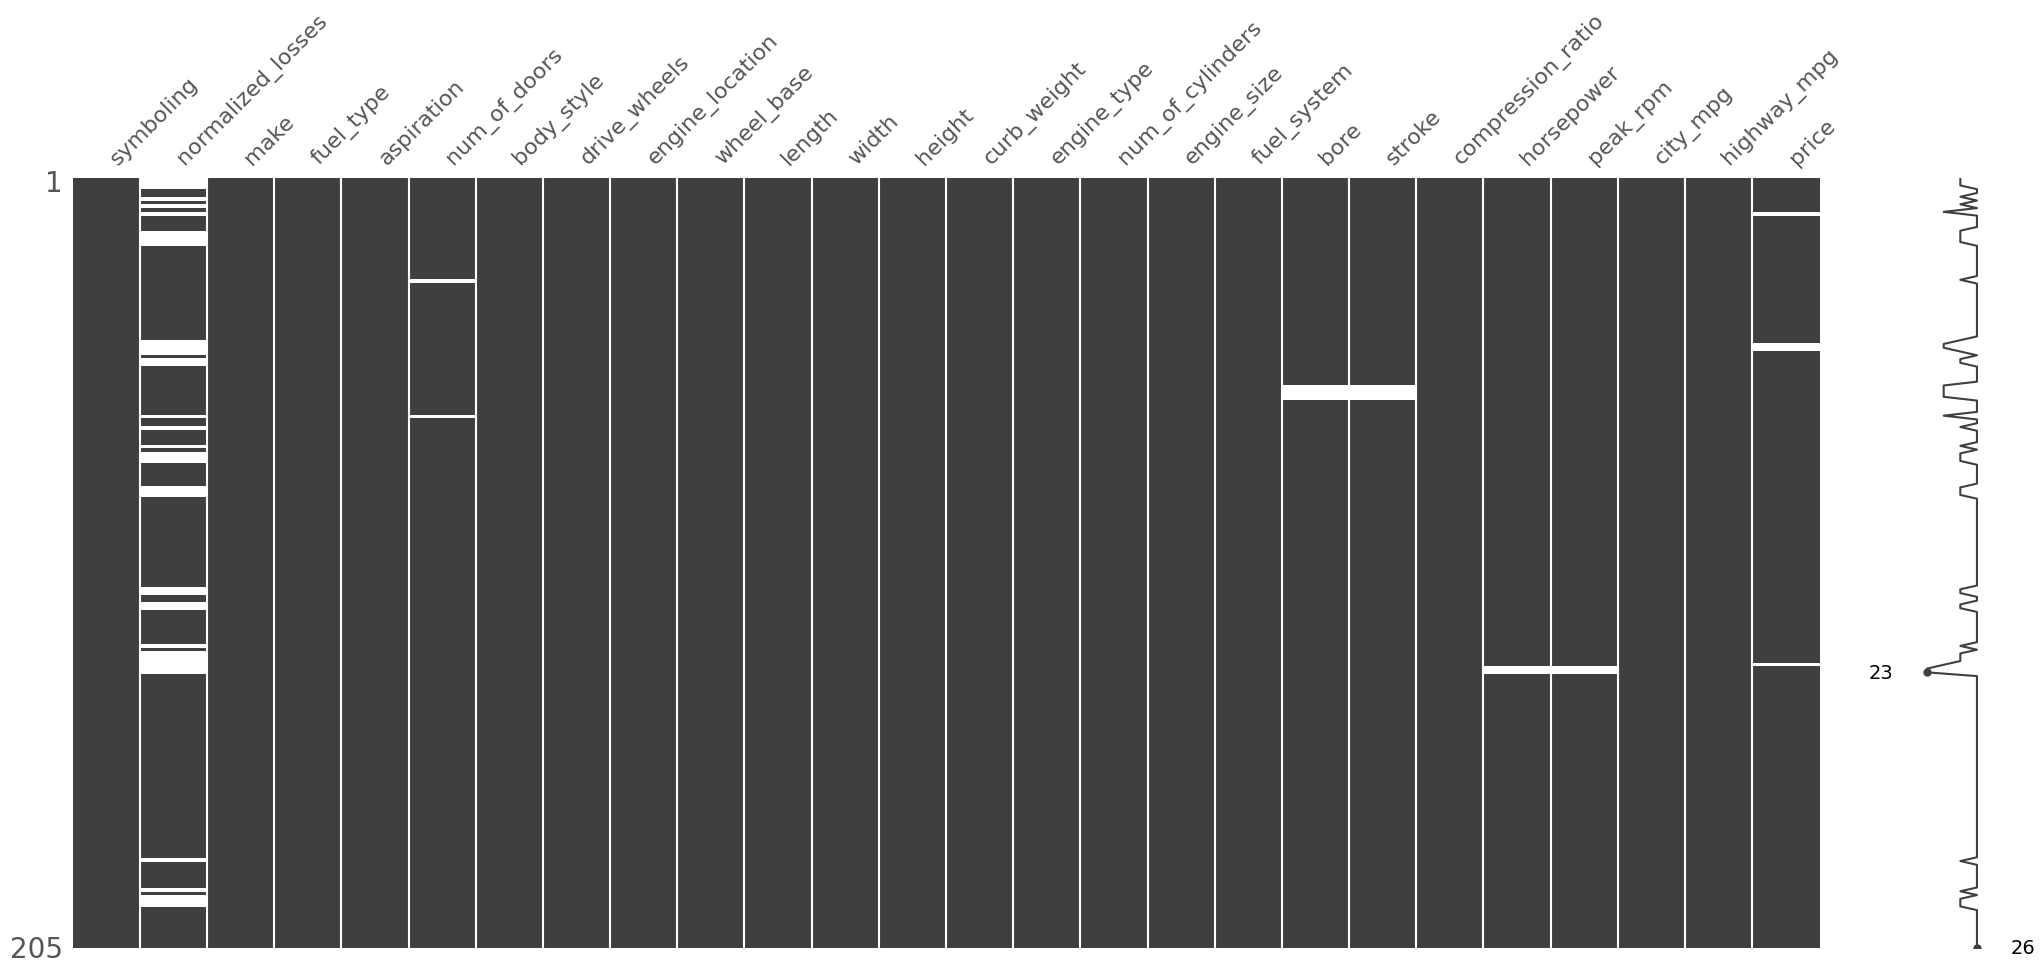

In [ ]:
import matplotlib.patches as mpatches

# Null visualization pattern
msno.matrix(m2df2)
plt.show();

Based on the matrix we can see that there are small groups of consecutive values missing in the normalized_losses, but there is not a clear pattern, suggesting that the data is missing at random.

## Replacing Null Values

Below we will replace null values in the attributes: num_of_doors, horsepower, peak_rpm, price, stroke and bore. Since the number of missing values in these attributes is very small (i.e. only 2% missing for price) we can replace the null values in each future with the median of their respective attribute.

In [ ]:
# Filling null value in each column with the corresponding median
m2df2['num_of_doors'].fillna(m2df2['num_of_doors'].median(), inplace=True)
m2df2['horsepower'].fillna(m2df2['horsepower'].median(), inplace=True)
m2df2['peak_rpm'].fillna(m2df2['peak_rpm'].median(), inplace=True)
m2df2['price'].fillna(m2df2['price'].median(), inplace=True)
m2df2['stroke'].fillna(m2df2['stroke'].median(), inplace=True)
m2df2['bore'].fillna(m2df2['bore'].median(), inplace=True)

In [ ]:
m2df2.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

The null values were replaced. Now we can fix the data types for these columns.

In [ ]:
# Fix some data types, and convert to numeric certain columns following data dictionary
m2df2 = m2df2.astype({"horsepower": int, "peak_rpm":int, "price":int, "bore":float, "stroke":float})

# Sanity check
m2df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    float64
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

We finished fixing almost all of the missing data and data types.

## **Categorical EDA**

Now, we will revisit how we are going to fill the Nulls for normalized_losses later. Now that we have replaced most of the Null values in the data, we will perform some exploratory data analysis on our categorical data.

In [ ]:
# Creating a list with the categorical attributes
categorical_features=['make','fuel_type','symboling', 'aspiration', 'body_style', 'drive_wheels', 'engine_location', 'engine_type','fuel_system']

In [ ]:
print(categorical_features)

['make', 'fuel_type', 'symboling', 'aspiration', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'fuel_system']


To have a closer look at each one we will plot 3 at a time, starting with 'make','fuel_type' and 'symboling' displaying distributions and boxplot

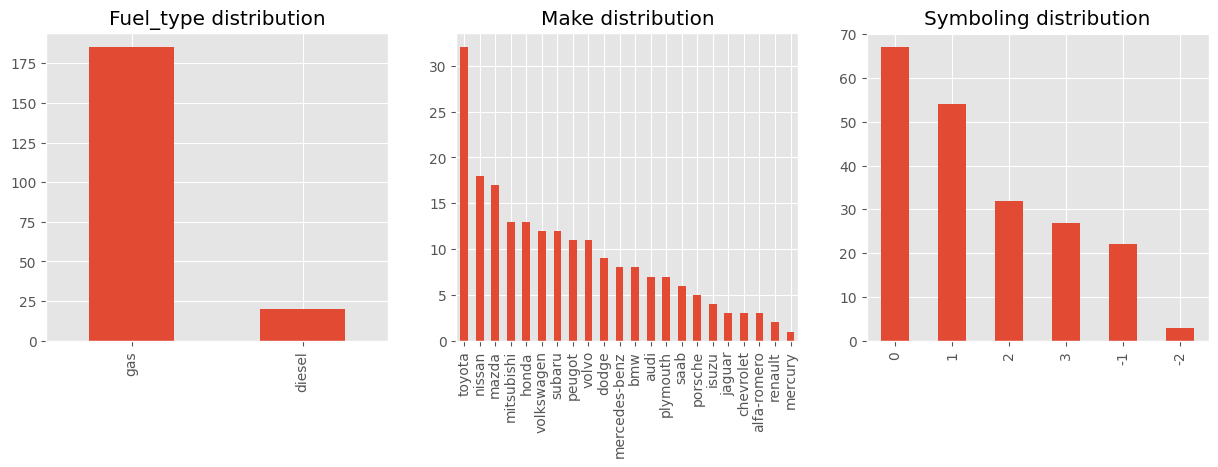

In [ ]:
# Showing distribution subplots of 'fuel_type', 'make' and 'symboling'
fig = plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
m2df2['fuel_type'].value_counts().plot.bar()
plt.title("Fuel_type distribution");

plt.subplot(1, 3, 2)
m2df2['make'].value_counts().plot.bar()
plt.title("Make distribution");

plt.subplot(1, 3, 3)
m2df2['symboling'].value_counts().plot.bar()
plt.title("Symboling distribution");

We see that there is sparse data or skewed data in all three of our attributes. We look at the boxplots.

<ipython-input-122-78c872b72b6c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


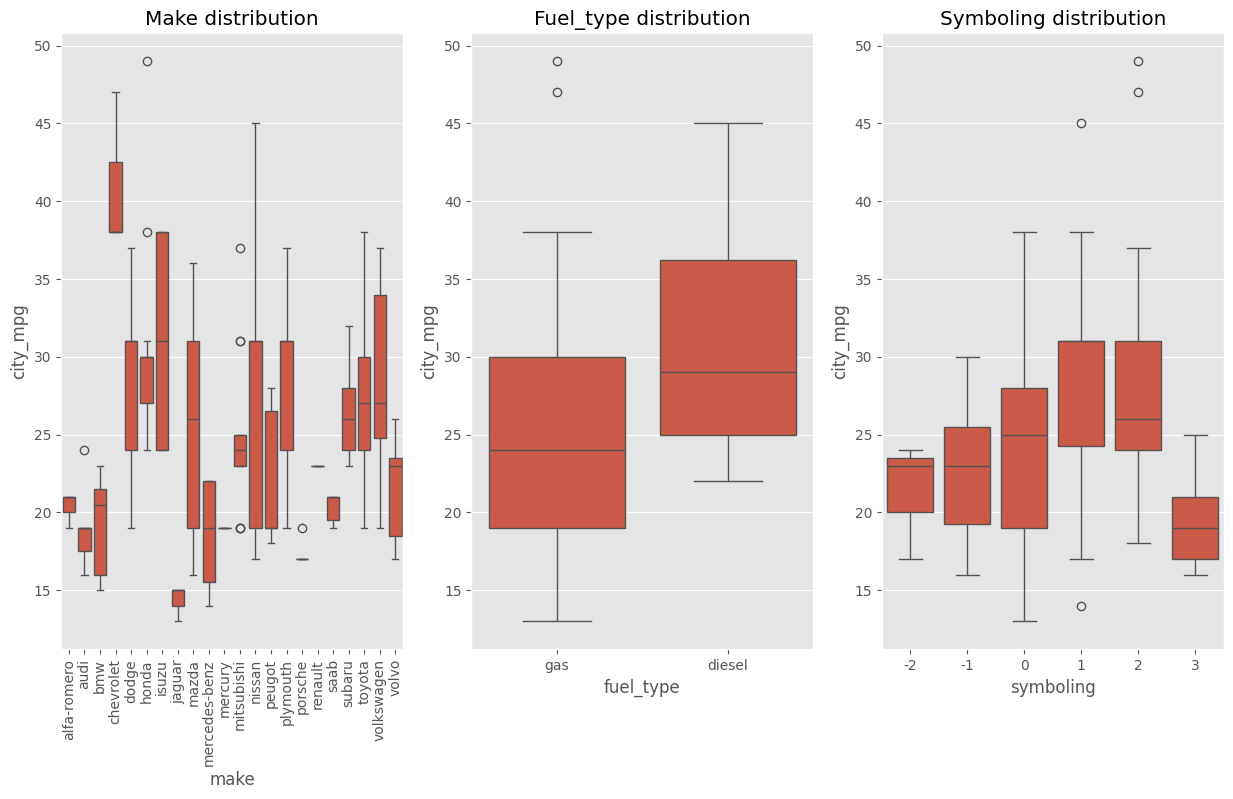

In [ ]:
# Showing boxplots for 'make', 'fuel_type' and 'symboling'
fig = plt.figure(figsize=(15,8))

plt.subplot(1, 3, 1)
ax=sns.boxplot(x="make", y="city_mpg", data=m2df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Make distribution");

plt.subplot(1, 3, 2)
sns.boxplot(x="fuel_type", y="city_mpg", data=m2df2)
plt.title("Fuel_type distribution");

plt.subplot(1, 3, 3)
sns.boxplot(x="symboling", y="city_mpg", data=m2df2)
plt.title("Symboling distribution");

For fuel_type we can see that, even though the data is imbalanced it seems to be a promising predictor.
Make feature can be grouped, setting a threshold (for example 5) to combine together cars and avoid sparse observations.

**Now that we have explored three of our fields let's take a look at the next three:**

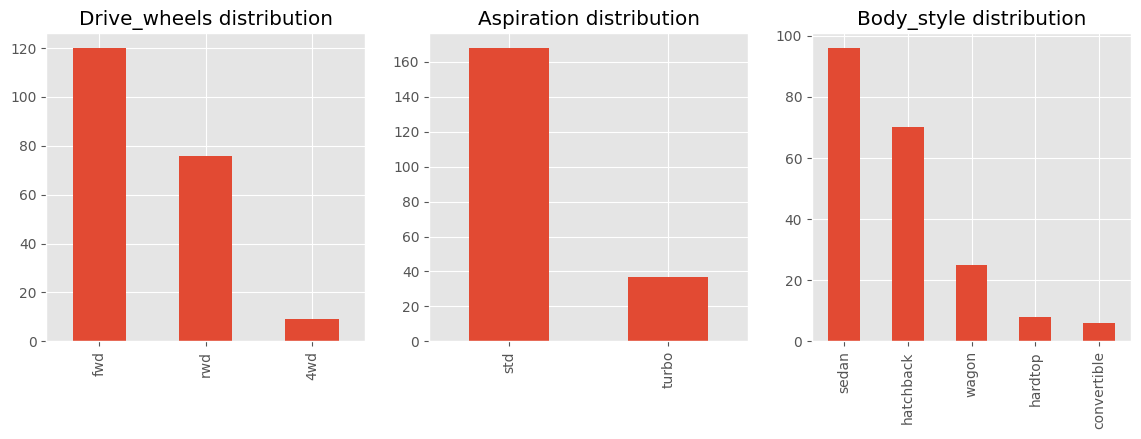

In [ ]:
# Showing distribution plots 'aspiration', 'body_style' and 'drive_wheels'
fig = plt.figure(figsize=(14,4))
plt.subplot(1, 3, 1)
m2df2['drive_wheels'].value_counts().plot.bar()
plt.title("Drive_wheels distribution");

plt.subplot(1, 3, 2)
m2df2['aspiration'].value_counts().plot.bar()
plt.title("Aspiration distribution");

plt.subplot(1, 3, 3)
m2df2['body_style'].value_counts().plot.bar()
plt.title("Body_style distribution");

<ipython-input-124-b0f77fc7d1ae>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


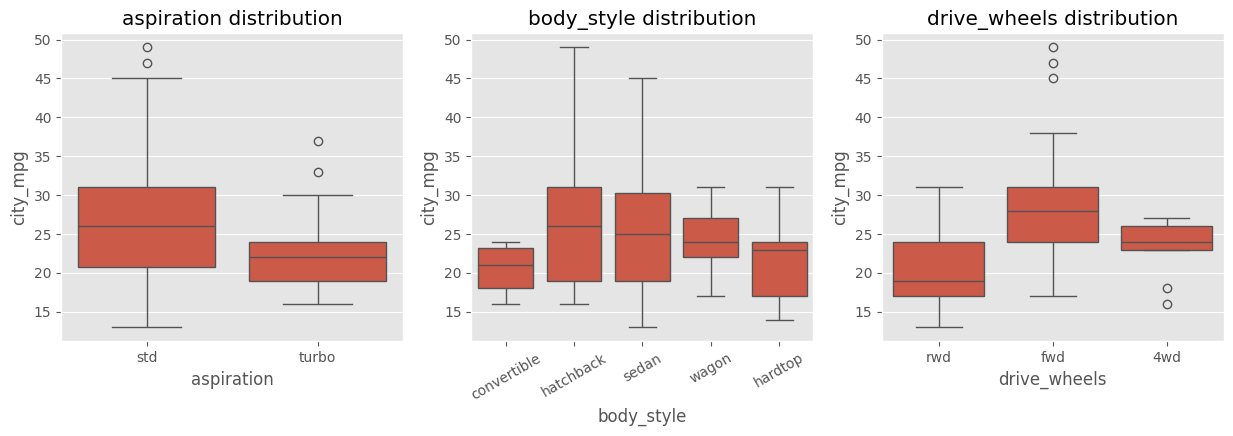

In [ ]:
# Showing boxplots distibution for 'aspiration distribution', 'body_style' and 'drive_wheels'
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.boxplot(x="aspiration", y="city_mpg", data=m2df2)
plt.title("aspiration distribution");

plt.subplot(1, 3, 2)
ax=sns.boxplot(x="body_style", y="city_mpg", data=m2df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("body_style distribution");

plt.subplot(1, 3, 3)
sns.boxplot(x="drive_wheels", y="city_mpg", data=m2df2)
plt.title("drive_wheels distribution");

According to my research, for drive_wheels, FWD means that the power from the engine is delivered to the front wheels of your vehicle, RWD means that the power from the engine is delivered to the rear wheels, and the rear wheels push the car forward, and 4WD means that the power from the engine is delivered to all four wheels at all times. Cars with rear wheels appear to have poorer mpg in general, whereas fwd have a greater mpg, despite the fact that there are relatively few observations for 4WD.

For aspiration, we can see that cars with turbo tend to have a higher fuel consumption, which suggest it would be a promising feature to include in our model.

Now that we have explored six of our fields let's take a look at the next three:

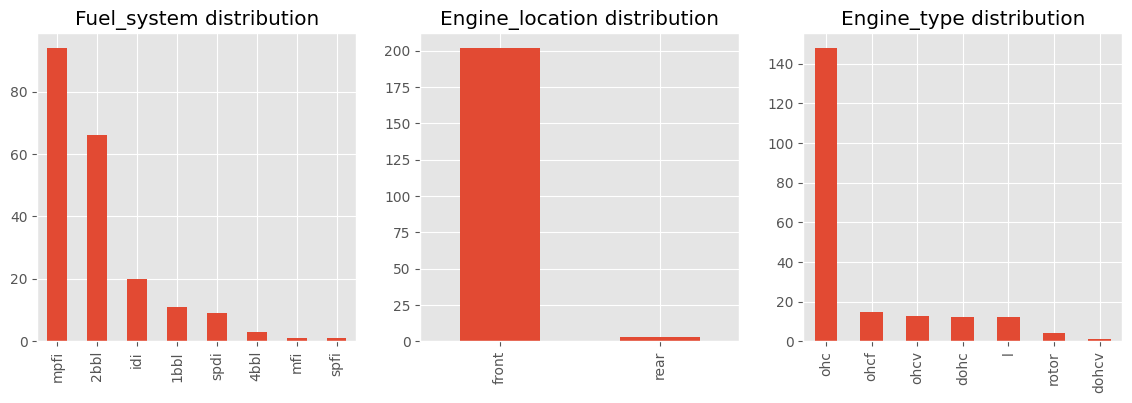

In [ ]:
# Showing distribution subplot 'engine_location', 'engine_type' and 'fuel_system'
fig = plt.figure(figsize=(14,4))

# Fuel system.
plt.subplot(1, 3, 1)
m2df2['fuel_system'].value_counts().plot.bar()
plt.title("Fuel_system distribution");

# Engine loc.
plt.subplot(1, 3, 2)
m2df2['engine_location'].value_counts().plot.bar()
plt.title("Engine_location distribution");

# Engine type.
plt.subplot(1, 3, 3)
m2df2['engine_type'].value_counts().plot.bar()
plt.title("Engine_type distribution");

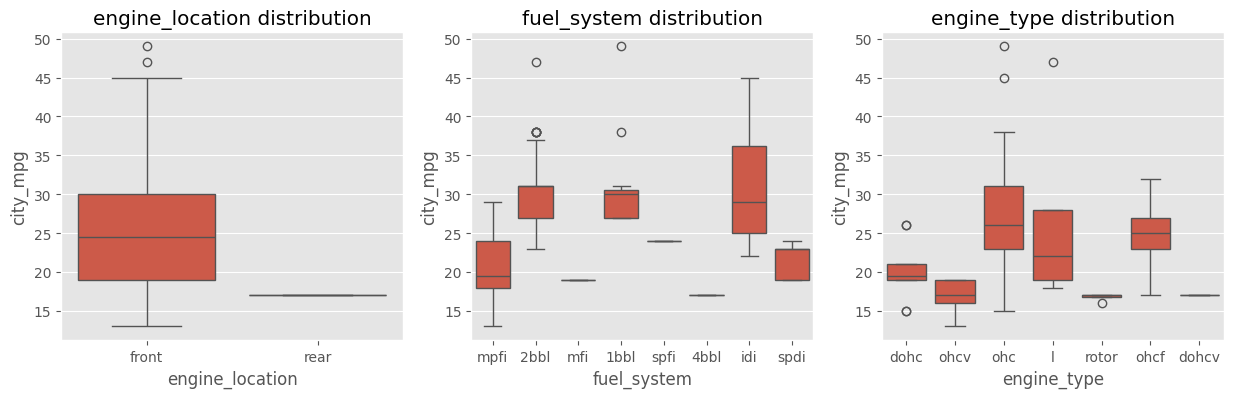

In [ ]:
# Showing boxplots distribution for 'engine_location', 'fuel_system' and 'engine_type'
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.boxplot(x="engine_location", y="city_mpg", data=m2df2)
plt.title("engine_location distribution");

plt.subplot(1, 3, 2)
sns.boxplot(x="fuel_system", y="city_mpg", data=m2df2)
plt.title("fuel_system distribution");

plt.subplot(1, 3, 3)
sns.boxplot(x="engine_type", y="city_mpg", data=m2df2)
plt.title("engine_type distribution");

We can see an imbalance distribution for engine_location, hence we might be able to exclude this feature as it has almost no variance on itself. We see sparce data for fuel_system and engine_type.

# Numerical EDA

After exploring the categorical data we will now turn our attention to preforming exploratory data analysis on our numerical attributes.

In [ ]:
m2df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    float64
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

normalized_losses has null values and its type is object, we will change to float, so to include the valid ones in our correlation matrix.

In [ ]:
# Changing the data type for normalized_losses to float
m2df2 = m2df2.astype({"normalized_losses": float})

We create a list of numerical features to use later and we remove symboling, as it is categorical

In [ ]:
numerical_features=m2df2.corr().columns.to_list()
numerical_features.remove('symboling')

<ipython-input-129-739404c2c387>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerical_features=m2df2.corr().columns.to_list()


<ipython-input-130-761a496609b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(m2df2.corr(),annot=True);


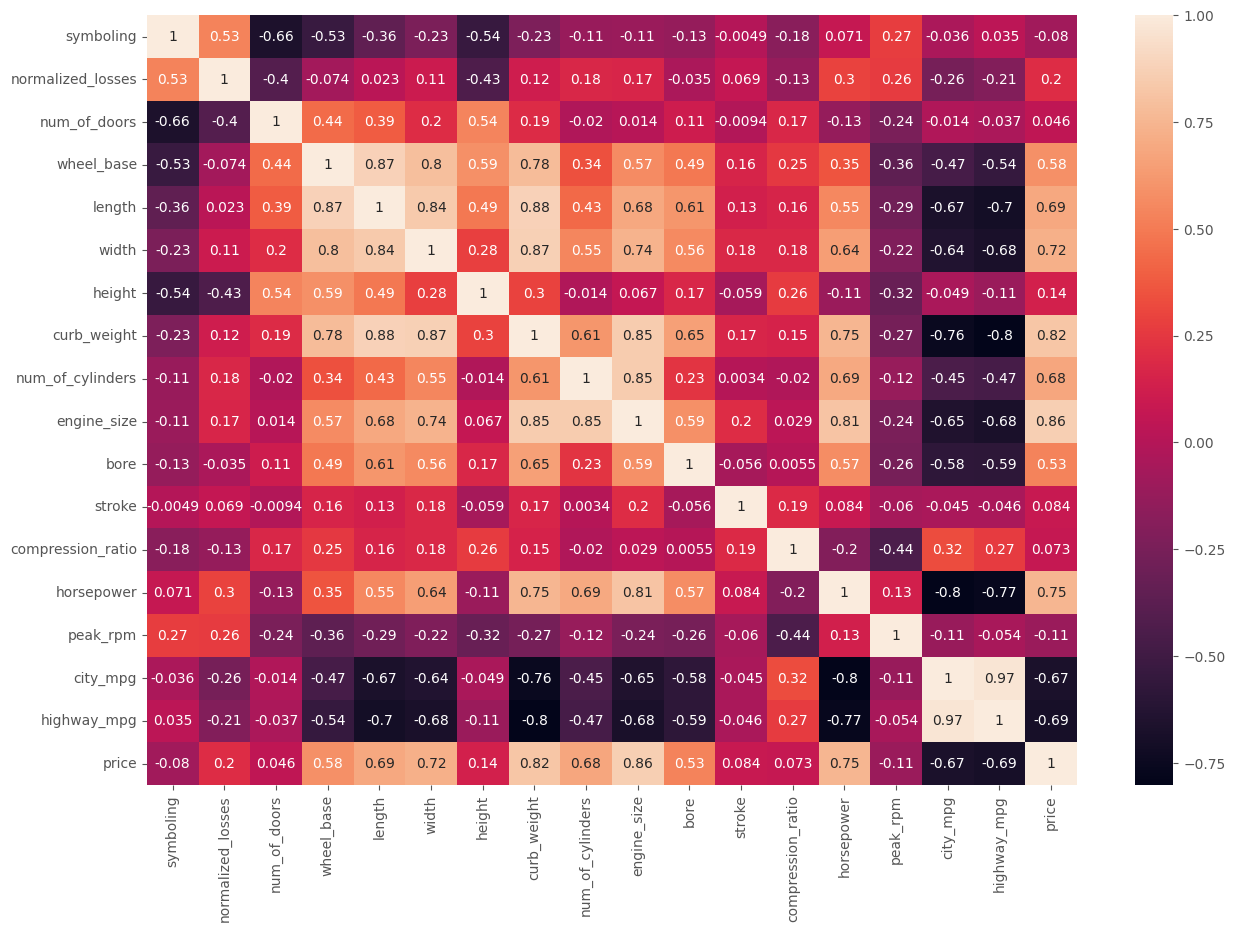

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(m2df2.corr(),annot=True);

**Insights:**

According to this graph, we can see an almost perfect correlation between highway-mpg and the response city-mpg but we won't consider it a potential predictor as both are measuring something similar, (the highway-mpg could have been our target variable).

It is interesting to see that there are 4 features related to the car dimensions (curb-weight, length, engine-size and width) that have a high negative correlation (< -0.6) which suggests that big cars tend to use more fuel than smaller ones to travel the same distance. It would be interesting to include these in our model.

Now we display features distributions

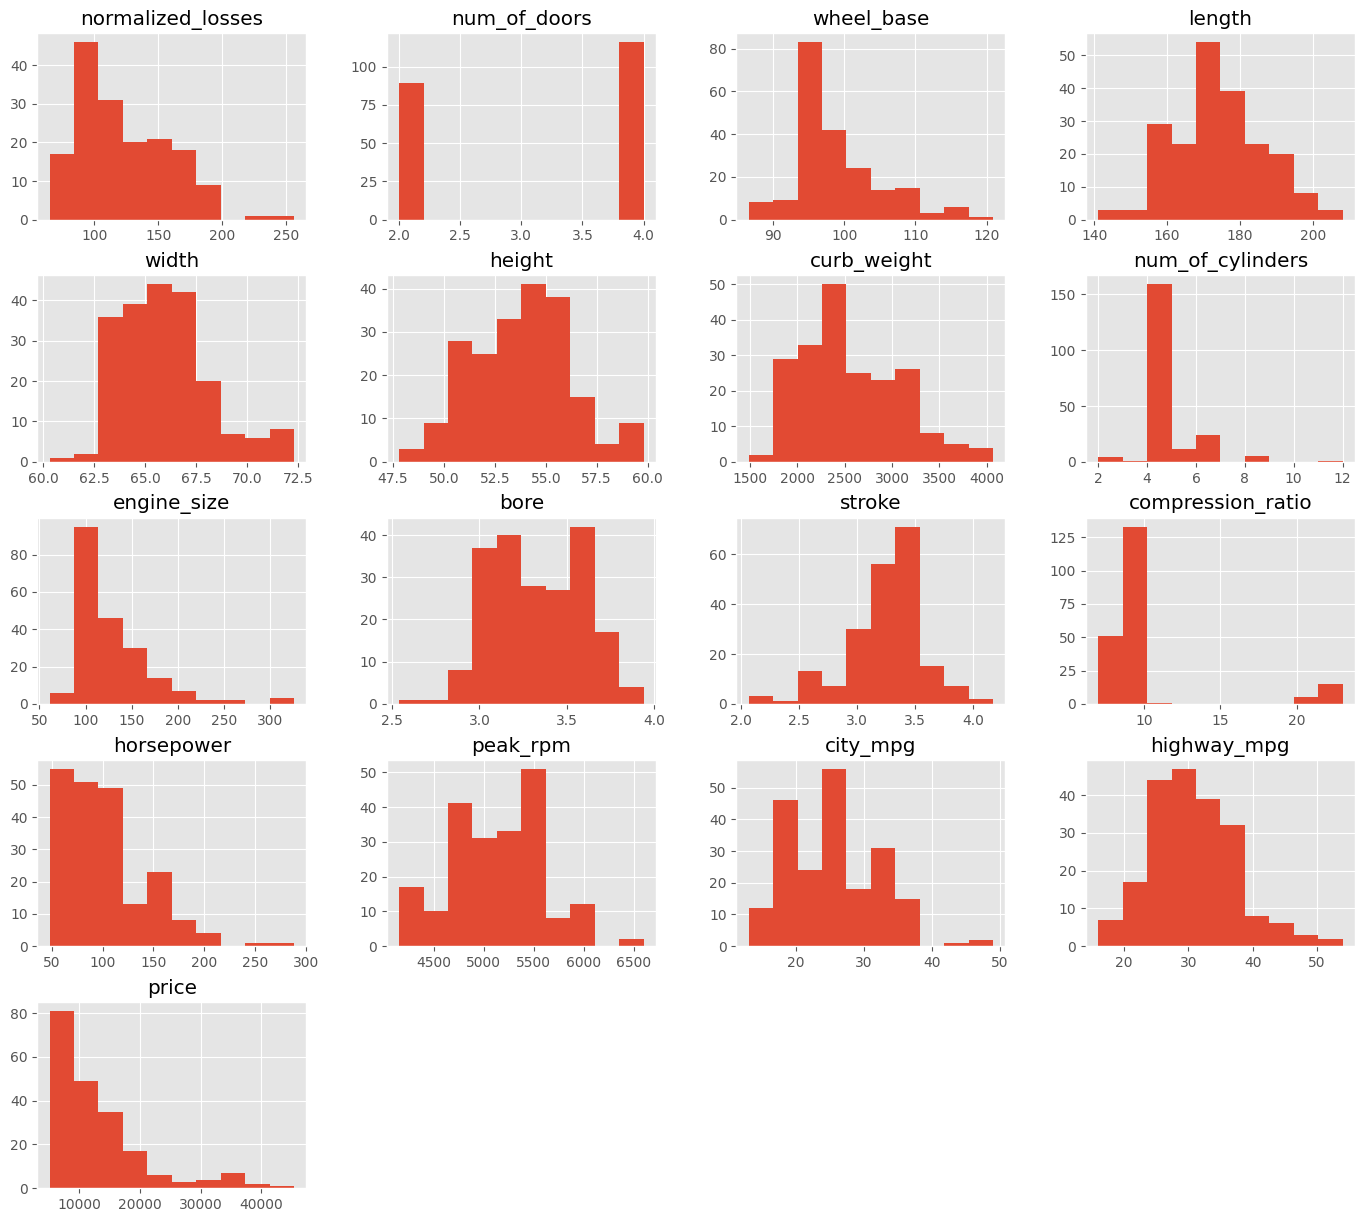

In [ ]:
m2df2[numerical_features].hist(figsize =(17,15));

Above we can see how the data for all the numerical attiributes are distributed, some contain skewed data, while some are normally distributed. We will address these issues later in the study.

### Missing values normalized_losses

After Preforming EDA for both categorical and numerical data we can now return to our question of how do deal with all of the missing data in normalized_losses?


### **Iterative Imputer**

We choose this technique because of the wide variety of attributes in the dataset and that we need to fill more than a few rows, so we will apply it and see if it maintains the shape of the probability density function we derived from the variable's known data.

Imputation via an iterative imputer (i.e., each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

First step will be to create dummy variables for existing categorical features.

In [ ]:
categorical_features

['make',
 'fuel_type',
 'symboling',
 'aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system']

In [ ]:
# Create dummies for all categorical variables, with the symboling
categorical_dummies = pd.DataFrame()
dummies_make = pd.get_dummies(m2df2['make'], prefix='make')
dummies_fuel_type = pd.get_dummies(m2df2['fuel_type'], prefix='fuel_type')
dummies_aspiration = pd.get_dummies(m2df2['aspiration'], prefix='aspiration')
dummies_body_style = pd.get_dummies(m2df2['body_style'], prefix='body_style')
dummies_drive_wheels = pd.get_dummies(m2df2['drive_wheels'], prefix='drive_wheels')
dummies_engine_location = pd.get_dummies(m2df2['engine_location'], prefix='engine_location')
dummies_engine_type = pd.get_dummies(m2df2['engine_type'], prefix='engine_type')
dummies_fuel_system = pd.get_dummies(m2df2['fuel_system'], prefix='fuel_system')

In [ ]:
# Join the dummies together
df_with_dummy = m2df2.join(dummies_make).join(dummies_fuel_type).join(dummies_aspiration).join(dummies_body_style).join(dummies_drive_wheels).join(dummies_engine_location).join(dummies_engine_type).join(dummies_fuel_system)

In [ ]:
# Drop the original columns
df_with_dummy.drop(columns=['make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'], inplace=True),

(None,)

In [ ]:
# Check the shape of 'df_with_dummy'
df_with_dummy.shape

(205, 69)

In [ ]:
# Check an existing null values
df_with_dummy.normalized_losses.isnull().sum()

41

### Iterative Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy

# Define imputer
imputer = IterativeImputer(random_state=0)

# Fit on the dataset
imputer.fit(df_with_dummy)

# Transform the dataset
df_imputed_trans = imputer.transform(df_with_dummy)
df_imputed_trans

array([[  3.        , 180.02855446,   2.        , ...,   1.        ,
          0.        ,   0.        ],
       [  3.        , 181.06693048,   2.        , ...,   1.        ,
          0.        ,   0.        ],
       [  1.        , 168.60276378,   2.        , ...,   1.        ,
          0.        ,   0.        ],
       ...,
       [ -1.        ,  95.        ,   4.        , ...,   1.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        ,   4.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        ,   4.        , ...,   1.        ,
          0.        ,   0.        ]])

In [ ]:
df_with_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized_losses       164 non-null    float64
 2   num_of_doors            205 non-null    float64
 3   wheel_base              205 non-null    float64
 4   length                  205 non-null    float64
 5   width                   205 non-null    float64
 6   height                  205 non-null    float64
 7   curb_weight             205 non-null    int64  
 8   num_of_cylinders        205 non-null    int64  
 9   engine_size             205 non-null    int64  
 10  bore                    205 non-null    float64
 11  stroke                  205 non-null    float64
 12  compression_ratio       205 non-null    float64
 13  horsepower              205 non-null    int64  
 14  peak_rpm                205 non-null    in

In [ ]:
# Get transformed numpy array as a dataframe
df_imputed_trans = pd.DataFrame(df_imputed_trans, columns=df_with_dummy.columns)
df_imputed_trans.head(1)

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,...,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3.0,180.028554,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Checking that there are no null values exists
df_imputed_trans.normalized_losses.isnull().sum()

0

In [ ]:
# Delete any row with at least one null value
null_free=m2df2.dropna(how="any")
null_free.shape

(164, 26)

<ipython-input-143-f340d159f31a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(null_free["normalized_losses"]);
<ipython-input-143-f340d159f31a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputed_trans["normalized_losses"]);


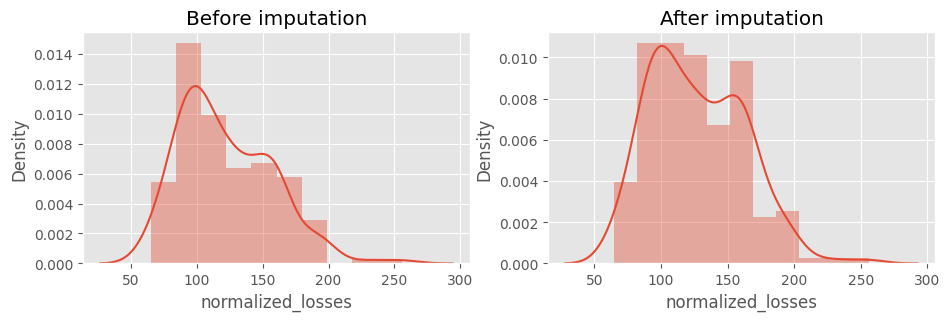

In [ ]:
# Checking the distribution before and after
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(null_free["normalized_losses"]);
plt.title("Before imputation");

plt.subplot(1, 2, 2)
sns.distplot(df_imputed_trans["normalized_losses"]);
plt.title("After imputation");

In [ ]:
# Stats for the original dataframe with missing values
null_free.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [ ]:
# Stats for the new dataframe without missing values
df_imputed_trans.normalized_losses.describe()

count    205.000000
mean     127.075637
std       35.454537
min       65.000000
25%       99.008090
50%      122.081175
75%      154.000000
max      256.000000
Name: normalized_losses, dtype: float64

### **Median**

Despite this would not be an ideal solution we decided to create it to compare with the previous technique for this specific dataset. We replace missing values with the 'normalized_losses' median, which is 115.

In [ ]:
m2df2['normalized_losses'].median()

115.0

In [ ]:
# Imputing the median
m2df2['normalized_losses'].fillna(m2df2['normalized_losses'].median(), inplace=True)

# Checking that there are no null values exists
m2df2.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

<ipython-input-148-6d499adc9b44>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(null_free["normalized_losses"]);
<ipython-input-148-6d499adc9b44>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m2df2["normalized_losses"]);


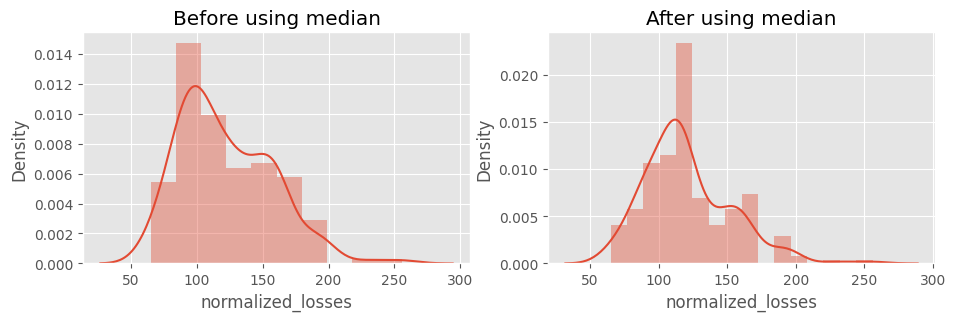

In [ ]:
# Checking the distribution before and after, with the median
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(null_free["normalized_losses"]);
plt.title("Before using median");

plt.subplot(1, 2, 2)
sns.distplot(m2df2["normalized_losses"]);
plt.title("After using median");

In [ ]:
null_free.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [ ]:
m2df2.normalized_losses.describe()

count    205.000000
mean     120.600000
std       31.805105
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: normalized_losses, dtype: float64

The median seems to be the imputation method that preserves the PDF the most. Because this is the case, we will use the median as the imputation method.

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing statsmodels.api
import statsmodels.api as sm

* First we will divide the dataset into predictors X and response variable **curb_weight** y.

In [ ]:
# Dividing the dataset into X and Y
X = m2df2[m2df2.columns[~m2df2.columns.isin(['curb_weight'])]]
y = m2df2['curb_weight']

In [ ]:
# Predictiors that we are interested in
Predictiors1 = ["height", "width", "length", "wheel_base","engine_size", "horsepower", "peak_rpm", "city_mpg"]
Predictiors2 = ["engine_size", "horsepower", "peak_rpm", "city_mpg"]
Predictiors3 = ["height", "width", "length", "wheel_base"]

# Linear Regression Model 1

Model 1 with the engine size variables

In [ ]:
X = X[Predictiors2]

In [ ]:
# Splitting dataset into 75/25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .75)

In [ ]:
# Checking it's shape
X_train.shape

(153, 4)

In [ ]:
# Checking it's shape
y_train.shape

(153,)

In [ ]:
y_train.head()


14     3055
162    2140
59     2385
19     1874
177    2458
Name: curb_weight, dtype: int64

In [ ]:
# Scaling Through standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculating the Cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error", cv = 10)
lin_reg_scores = np.sqrt(-scores)

In [ ]:
# Define the function to display the scores
def display_scores(scores):
    print("\nScores:",scores,"\n")
    print("Mean:",scores.mean(),"\n")
    print("Standard Deviation:",scores.std(),"\n")
display_scores(lin_reg_scores)


Scores: [199.67744344 226.024336   241.55709836 231.0044985  330.28014406
 217.71797048 213.50922897 226.95594543 275.3190105  179.09436565] 

Mean: 234.11400413866983 

Standard Deviation: 40.04241780991642 



In [ ]:
# Testing set for Mean squared error and Root mean squared error
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

189.45558538681667

In [ ]:
#showing accuracy Backwards Elimination
# get average accuracy across all 5 folds
np.mean(cross_val_score(regressor, X_train, y_train, cv = 5))

0.7643899328478032

# Linear Regression Model 2

Model 2 with the car size measurement variables

In [ ]:
# Dividing dataset into X and Y
X = m2df2[m2df2.columns[~m2df2.columns.isin(['curb_weight'])]]
y = m2df2['curb_weight']

In [ ]:
# Keeping only engine perameters
X = X[Predictiors3]

In [ ]:
# Splitting dataset into 75/25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .75)

In [ ]:
# Checking it's shape
X_train.shape

(153, 4)

In [ ]:
# Checking it's shape
y_train.shape

(153,)

In [ ]:
# Scaling Through standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculating the Cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error", cv = 10)
lin_reg_scores = np.sqrt(-scores)

In [ ]:
# Define the function to display the scores
def display_scores(scores):
    print("\nScores:",scores,"\n")
    print("Mean:",scores.mean(),"\n")
    print("Standard Deviation:",scores.std(),"\n")
display_scores(lin_reg_scores)


Scores: [175.91157806 253.32556737 217.86979341 156.44091263 360.38899989
 206.50202694 158.69825464 255.1747546  272.38297239 233.00729319] 

Mean: 228.9702153100693 

Standard Deviation: 58.389750396454595 



In [ ]:
# Testing set for Mean squared error and Root mean squared error
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

181.65557682018837

In [ ]:
# Showing accuracy Backwards Elimination and Get an average accuracy across all 5 folds
np.mean(cross_val_score(regressor, X_train, y_train, cv = 5))

0.7746774762010332

# Linear Regression Model 3

Model 3 with other 8 variables included

In [ ]:
# Dividing the dataset into X and Y
X = m2df2[m2df2.columns[~m2df2.columns.isin(['curb_weight'])]]
y = m2df2['curb_weight']

In [ ]:
# Checking the shape
X_train.shape

(153, 8)

In [ ]:
# Keeping only engine perameters
X = X[Predictiors1]

In [ ]:
# Splitting the dataset into 75/25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .75)

In [ ]:
# Checking the shape
y_train.shape

(153,)

In [ ]:
# Scaling through the standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculating the Cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error", cv = 10)
lin_reg_scores = np.sqrt(-scores)

In [ ]:
# Define the function to display the scores
def display_scores(scores):
    print("\nScores:",scores,"\n")
    print("Mean:",scores.mean(),"\n")
    print("Standard Deviation:",scores.std(),"\n")
display_scores(lin_reg_scores)


Scores: [135.28573249 158.51475482 122.98049429 134.42936609 315.24209324
 152.4353488   92.659479   122.41936161 169.60797953 137.34196177] 

Mean: 154.09165716370063 

Standard Deviation: 57.44414549944076 



In [ ]:
# Testing set for mean squared error and root mean square error
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

132.81796380151678

In [ ]:
# Showing accuracy Backwards Elimination and Get average accuracy across all 5 folds
np.mean(cross_val_score(regressor, X_train, y_train, cv = 5))

0.8927475806787013

**After Cross Validation, we Understood that my model 3 performs well with 89% Accuracy.**

#Conclusion-

* In this limited dataset comprising 205 observations, preserving as much information as possible was crucial. Initially, we addressed missing values represented by question marks. Subsequently, we explored various imputation methods. However, after careful evaluation, the Median imputation method emerged as the most effective. It not only addressed the missing values but also demonstrated superior performance in maintaining the probability density function, resulting in optimal outcomes for our linear regression model.

* We learned from the EDA that there are 8 variables which are going to be predictor variables which are "height", "width", "length", "wheel_base", "engine_size", "horsepower", "peak_rpm", "city_mpg".

* To get the curb_weight from the the predictors we created 3 models.

* First model with only engine related variables which are "engine_size", "horsepower", "peak_rpm", "city_mpg"

* Second model with only car size measurement related variables which are "height", "width", "length", "wheel_base"

* Third mode with all contributing variables we learned from EDA which are "height", "width", "length", "wheel_base", "engine_size", "horsepower", "peak_rpm", "city_mpg"
